In [1]:
from seeding import d2_seeding2, pca_aggregate2
from sklearn.datasets import make_blobs
from time import time
from tqdm import tqdm
import numpy as np

import matplotlib.pyplot as plt

In [2]:
sample_seeds = [0, 42, 2024]
dimensions = [2, 10, 20, 30, 40, 50, 60, 70]
time_agg = np.zeros((4, len(dimensions)))
time_d2 = np.zeros((4, len(dimensions)))

clusters = np.zeros((4, len(dimensions)))

In [3]:
for i in tqdm(range(len(dimensions))):
    ii = dimensions[i]
    for seed in sample_seeds:
        np.random.seed(seed)
        data1 = np.random.normal(0, 1, size=(5000, ii))
        data2 = np.random.normal(0, 5, size=(5000, ii))
        data3 = np.random.normal(0, 10, size=(5000, ii))
        data4 = np.random.normal(0, 20, size=(5000, ii))

        data = [data1, data2, data3, data4]
        for d in range(4):
            dd = data[d]
            st = time()
            if ii <= 30:
                xmin = dd.min(axis=0)
                xmax = dd.max(axis=0)
                centers = pca_aggregate2((dd - xmin)/(xmax - xmin), 1)
                et = time()
                time_agg[d, i] += (et - st)/len(sample_seeds)

                st = time()
                centers = d2_seeding2(dd, centers.shape[0])
                et = time()
                time_d2[d, i] += (et - st)/len(sample_seeds)
                clusters[d, i] += centers.shape[0]/len(sample_seeds)
            else:
                xmin = dd.min(axis=0)
                xmax = dd.max(axis=0)
                centers = pca_aggregate2((dd - xmin)/(xmax - xmin), 1.5)
                et = time()
                time_agg[d, i] +=  (et - st)/len(sample_seeds)

                st = time()
                centers = d2_seeding2(dd, centers.shape[0])
                et = time()
                time_d2[d, i] += (et - st)/len(sample_seeds)
                clusters[d, i] += centers.shape[0]/len(sample_seeds)
                
            # print(clusters[d, i], time_d2[d, i], time_agg[d, i])

100%|██████████| 8/8 [08:56<00:00, 67.12s/it]


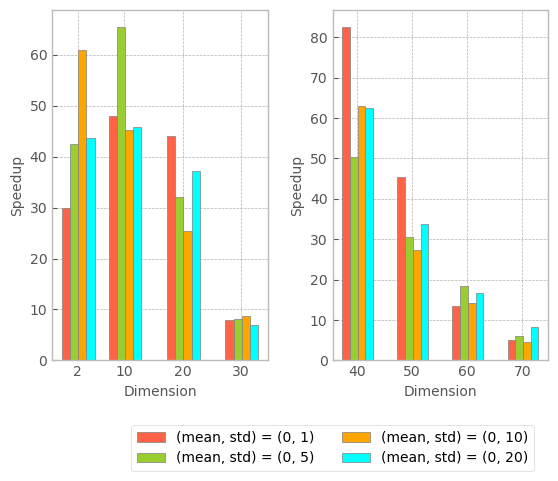

In [41]:
fig, axs = plt.subplots(1,2)
fontsize = 10
dist = time_d2 / time_agg 

colors = ['tomato', 'yellowgreen', 'orange', 'cyan']
titles = ['(mean, std) = (0, 1)', '(mean, std) = (0, 5)', '(mean, std) = (0, 10)', '(mean, std) = (0, 20)']

plt.rcParams['axes.facecolor'] = 'white'
barwidth = 1.4

for j in range(4):
    axs[0].bar(np.array(dimensions[:4]) + j*barwidth - 2, dist[j, :4], color =colors[j], width=barwidth, 
            edgecolor ='grey', label=titles[j])
    
for j in range(4):
    axs[1].bar(np.array(dimensions[4:]) + j*barwidth - 2, dist[j, 4:], color =colors[j], width=barwidth, 
            edgecolor ='grey', label=titles[j]) 
    
axs[0].set_xticks(dimensions[:4], fontsize = fontsize)
axs[1].set_xticks(dimensions[4:], fontsize = fontsize)
plt.grid(True)
plt.legend(loc='center', bbox_to_anchor=(0, 0., 0, -0.5), ncol=2, fontsize=fontsize)
axs[0].set_xlabel('Dimension', fontsize = fontsize) # fontweight ='bold' 
axs[0].set_ylabel('Speedup', fontsize = fontsize) 
axs[1].set_xlabel('Dimension', fontsize = fontsize) # fontweight ='bold' 
axs[1].set_ylabel('Speedup', fontsize = fontsize) 

plt.yticks(fontsize = fontsize)
plt.subplots_adjust(bottom = 0.15, wspace=0.3) 
plt.savefig('results/d2psa.pdf', bbox_inches='tight')